In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [67]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [68]:
df["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [69]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Density'>

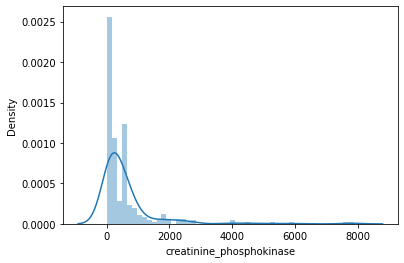

In [49]:
sns.distplot(df["creatinine_phosphokinase"])

In [173]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [174]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [175]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [176]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [177]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
pred=lr.predict(x_test)

score=accuracy_score(y_test,pred)
score

0.7888888888888889

In [178]:
confusion_matrix(y_test,pred)

array([[50,  3],
       [16, 21]], dtype=int64)

In [195]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [196]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [197]:
pred_sv=sv.predict(x_test)
score=accuracy_score(y_test,pred_sv)
print(score)
confusion_matrix(y_test,pred_sv)

0.7666666666666667


array([[49,  4],
       [17, 20]], dtype=int64)

In [198]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [199]:
pred_dt=dt.predict(x_test)
score=accuracy_score(y_test,pred_dt)
print(score)
confusion_matrix(y_test,pred_dt)

0.6666666666666666


array([[41, 12],
       [18, 19]], dtype=int64)

In [201]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [202]:
pred_rf=rf.predict(x_test)
score=accuracy_score(y_test,pred_rf)
print(score)
confusion_matrix(y_test,pred_rf)

0.7666666666666667


array([[49,  4],
       [17, 20]], dtype=int64)

In [205]:
from sklearn.feature_selection import RFE

In [214]:
rfe_lr=RFE(estimator=rf,n_features_to_select=9,verbose=1)
rfe_lr.fit(x_train,y_train)
rfe_lr.score(x_test,y_test)

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.


0.7333333333333333